In [13]:

import imageio as io
import matplotlib.pylab as plt
import numpy as np
import math



In [14]:
#read in the csv file with the data from the second channel
file = open("channel2.csv", "r")
#load csv into a 2d numpy array
image=np.loadtxt(file, delimiter=",", dtype='float',)
wholeimage = io.imread('input-image.png')


In [15]:
#check the shape of channel 2
image.shape

(100, 100)

In [16]:

image_size=image.shape[1]
print (image_size)

100


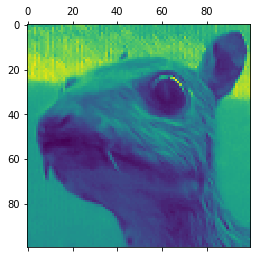

In [17]:
#display channel 2 by subscripting into the original image
plt.matshow(wholeimage[:,:,2])


In [18]:
#Define the kernels to be used

identity= np.zeros((3,3))
identity[1][1]=1
print (identity)

five= np.ones((5,5))

edge_detection1=np.array([[1, 0, -1],
                 [0, 1, 0],
                 [-1, 0, 1]])

edge_detection2=np.array([[0, 1, 0],
                 [1, -4, 1],
                 [0, 1, 0]])


edge_detection3=np.array([[-1, -1, -1,],
                 [-1, 8, -1],
                 [-1, -1, -1]])

sharpen=np.array([[0, -1, 0],
        [-1, 5, -1],
         [0, -1, 0]])

box_blur=np.ones((3,3))*(1/9)

print(box_blur)

print(five)

gaussian_blur=np.array([[1, 2, 1,],
                [2, 4, 2,],
                [1, 2, 1,]])




gaussian_blur5=np.array( [[1, 4, 6, 4, 1],
 [4, 16, 24, 16,  4],
 [ 6, 24, 36, 24,  6],
 [4, 16, 24, 16,  4],
 [1, 4, 6, 4, 1]] )*(1/256)

unsharp_masking=np.array( [[1, 4, 6, 4, 1],
 [4, 16, 24, 16,  4],
 [ 6, 24, -476, 24,  6],
 [4, 16, 24, 16,  4],
 [1, 4, 6, 4, 1]] )*(-1/256)


print(gaussian_blur5)



[[0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 0.]]
[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]
[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
[[0.00390625 0.015625   0.0234375  0.015625   0.00390625]
 [0.015625   0.0625     0.09375    0.0625     0.015625  ]
 [0.0234375  0.09375    0.140625   0.09375    0.0234375 ]
 [0.015625   0.0625     0.09375    0.0625     0.015625  ]
 [0.00390625 0.015625   0.0234375  0.015625   0.00390625]]


In [19]:
#function takes in 
def convolve(image,kernel):
    image_pixel=0
    image_kernel=0
    print("image shape:",image.shape)
    print("kernel shape:",kernel.shape)
    print("kernel sum",kernel.sum())
    print("edge cutoff",(kernel.shape[1]//2)*2)
    #create a new image size to account for cutoff edges
    new_size= (image.shape[1]-(kernel.shape[1]//2)*2)
    new_image=np.ones((new_size,new_size))
    #moves the kernel "window" of interest through the image
    for image_y in range(new_size):
        for image_x in range(new_size):
                #reset the convolution value
                image_kernel_convolution=0
                #move through the kernel window to do the convolution
                for kernel_y in range(kernel.shape[1]):                  
                        for kernel_x in range(kernel.shape[1]):
                            #get the appropriate pixel from the original image
                            image_pixel=image[image_x+kernel_x][image_y+kernel_y]
                            #sum the convolution of the kernel values and corresponding image values
                            image_kernel_convolution+=kernel[kernel_x][kernel_y]*image_pixel
                #set the appropriate new image pixel to the value found from convolution            
                new_image[image_x][image_y]=image_kernel_convolution/ (kernel.shape[0] * kernel.shape[1])
    return new_image

        

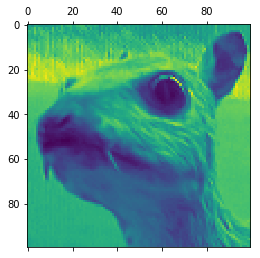

In [20]:
plt.matshow(image)

image shape: (100, 100)
kernel shape: (3, 3)
kernel sum 1.0
edge cutoff 2
image shape: (98, 98)
kernel shape: (3, 3)
kernel sum 1.0
edge cutoff 2


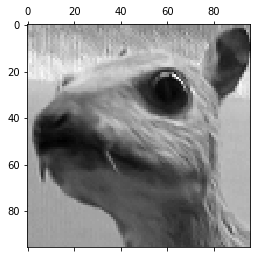

In [21]:
test = convolve(image,identity)
test = convolve(test,identity)


plt.matshow(test, cmap='gray')


image shape: (100, 100)
kernel shape: (3, 3)
kernel sum 1
edge cutoff 2
image shape: (98, 98)
kernel shape: (3, 3)
kernel sum 1
edge cutoff 2


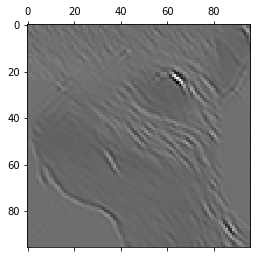

In [23]:
test = convolve(image,edge_detection1)
test = convolve(test,edge_detection1)


#print (test.shape)
plt.matshow(test, cmap='gray')

image shape: (100, 100)
kernel shape: (3, 3)
kernel sum 0
edge cutoff 2
image shape: (98, 98)
kernel shape: (3, 3)
kernel sum 0
edge cutoff 2


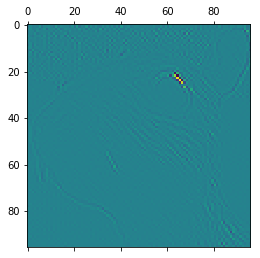

In [24]:
test = convolve(image,edge_detection2)
test = convolve(test,edge_detection2)

plt.matshow(test)

image shape: (100, 100)
kernel shape: (3, 3)
kernel sum 0
edge cutoff 2
image shape: (98, 98)
kernel shape: (3, 3)
kernel sum 0
edge cutoff 2


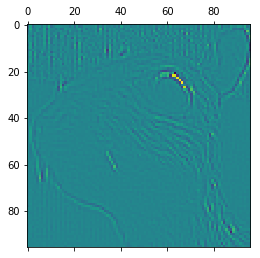

In [25]:
test = convolve(image,edge_detection3)
test = convolve(test,edge_detection3)

plt.matshow(test)

image shape: (100, 100)
kernel shape: (3, 3)
kernel sum 1.0
edge cutoff 2


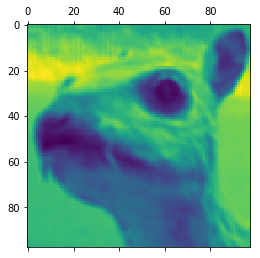

In [26]:
test = convolve(image,box_blur)
#test = convolve(test,box_blur)

plt.matshow(test)

image shape: (100, 100)
kernel shape: (3, 3)
kernel sum 16
edge cutoff 2
image shape: (98, 98)
kernel shape: (3, 3)
kernel sum 16
edge cutoff 2


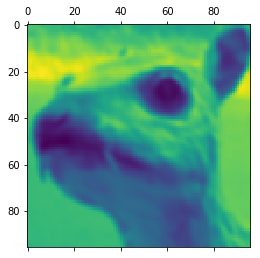

In [27]:
test = convolve(image,gaussian_blur)
test = convolve(test,gaussian_blur)


plt.matshow(test)

image shape: (100, 100)
kernel shape: (5, 5)
kernel sum 1.0
edge cutoff 4
image shape: (96, 96)
kernel shape: (5, 5)
kernel sum 1.0
edge cutoff 4


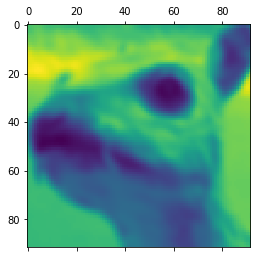

In [28]:
test = convolve(image,gaussian_blur5)
test = convolve(test,gaussian_blur5)

plt.matshow(test)

image shape: (100, 100)
kernel shape: (5, 5)
kernel sum 1.0
edge cutoff 4
image shape: (96, 96)
kernel shape: (5, 5)
kernel sum 1.0
edge cutoff 4
image shape: (100, 100)
kernel shape: (5, 5)
kernel sum 1.0
edge cutoff 4


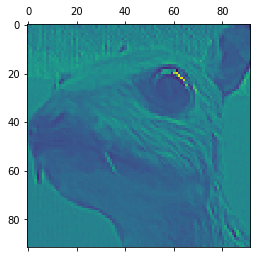

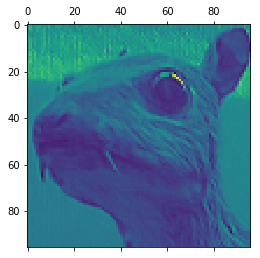

In [29]:
test = convolve(image,unsharp_masking)
test = convolve(test,unsharp_masking)
plt.matshow(test)
test = convolve(wholeimage[:,:,2],unsharp_masking)
plt.matshow(test)

(100, 100)
(3, 3)
kernel sum 1
edge cutoff 2


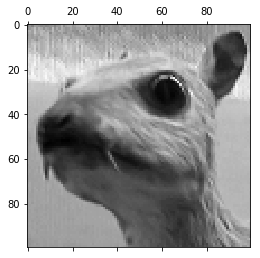

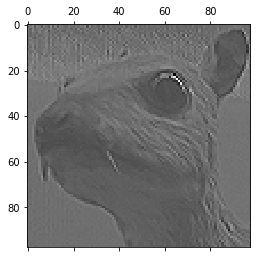

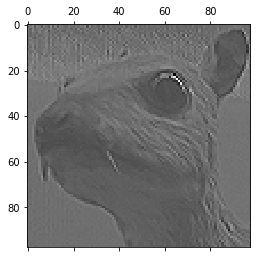

In [510]:
plt.matshow(image, cmap='gray')
test = convolve(image,sharpen)
plt.matshow(test, cmap='gray')

plt.matshow(test, cmap='gray')

'C:\\Users\\ramon'